<a href="https://colab.research.google.com/github/rossialana/Beer_consumption-/blob/main/Beer_consumption_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dados = pd.read_csv('/content/drive/MyDrive/Alura/Regressão Linear/Consumo_cerveja.csv', sep=';')
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [2]:
dados.shape

(365, 7)

In [3]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


Verificando correlação linear dos dados
Importante que as variáveis explicativas (Xs) não tenham forte correlação entre si

In [4]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


Visualizando a variação do consumo de cerveja durante o ano

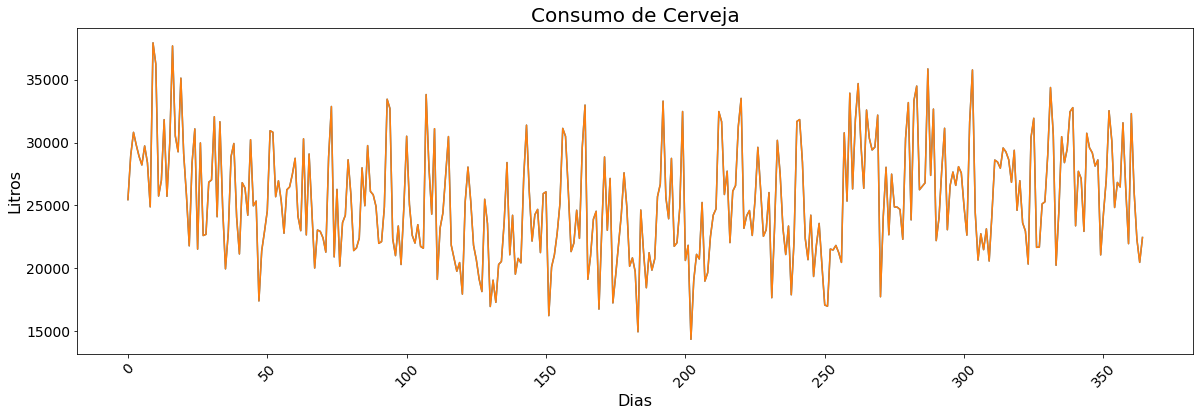

In [5]:
fig, ax = plt.subplots(figsize=(20, 6)) 

ax = dados['consumo'].plot()
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)
ax.tick_params(axis = 'x', rotation=45)

Plotando consumo de cerveja com Box Plot

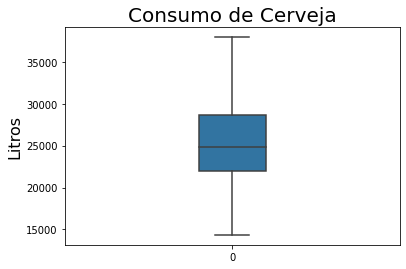

In [6]:
import seaborn as sns
ax = sns.boxplot(data=dados['consumo'], width = 0.2)

plt.rcParams["figure.figsize"] = [12,20]
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax

Verificando consumo segregado em dias da semana e finais da semana
Presença de outliers nos dias de semana

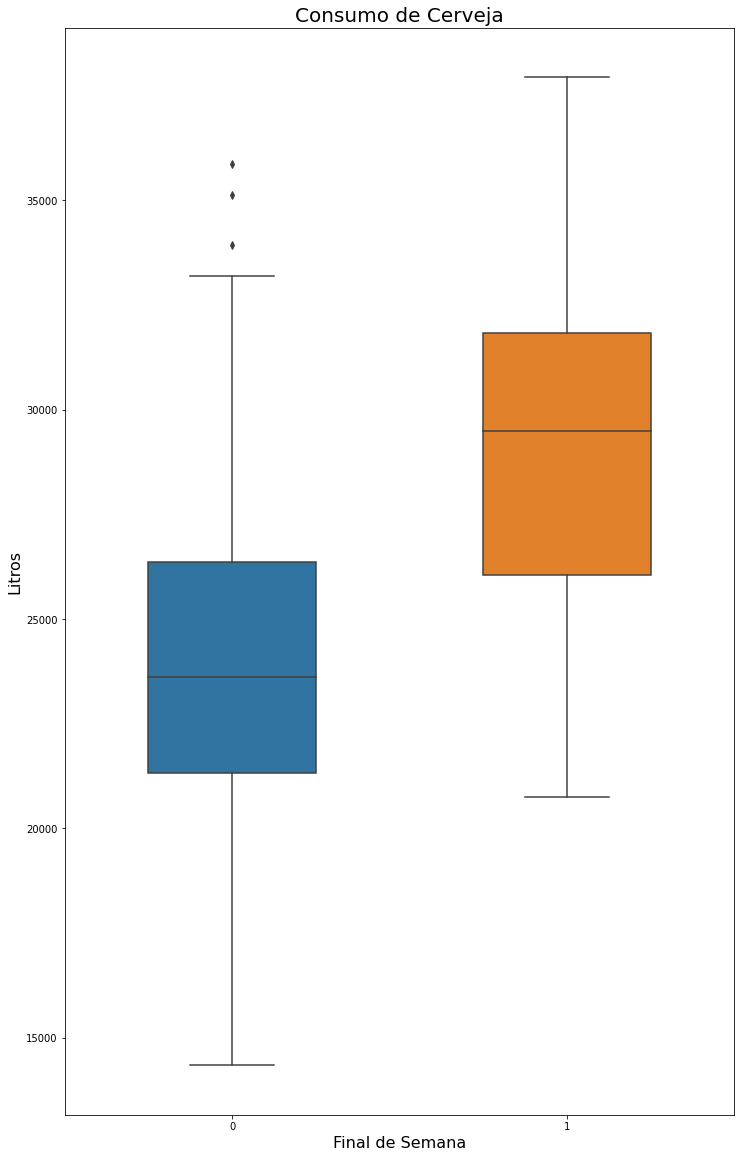

In [7]:
import seaborn as sns
ax = sns.boxplot(y='consumo', x='fds', data=dados, width = 0.5)

plt.rcParams["figure.figsize"] = [10,7]
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

Filtrando apenas dados com dias de semana

In [8]:
fim_de_semana = (dados["fds"] == 0)
fim_de_semana

0       True
1       True
2      False
3      False
4       True
       ...  
360    False
361     True
362     True
363     True
364     True
Name: fds, Length: 365, dtype: bool

Criando variável apenas com dados dos dias da semana

In [9]:
semana = dados[fim_de_semana]
semana

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
5,06/01/2015,23.78,20.1,30.5,12.2,0,28218
6,07/01/2015,24.00,19.5,33.7,0.0,0,29732
...,...,...,...,...,...,...,...
358,25/12/2015,23.58,17.8,31.0,39.0,0,26308
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [10]:
semana.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,261.00,261.00,261.00,261.00,261.0,261.00
mean,21.33,17.57,26.72,5.18,0.0,23998.22
std,3.17,2.77,4.29,12.07,0.0,3787.53
min,14.52,11.00,16.10,0.00,0.0,14343.00
25%,19.02,15.30,23.90,0.00,0.0,21327.00
50%,21.40,18.00,26.90,0.00,0.0,23614.00
75%,23.58,19.50,29.40,3.20,0.0,26362.00
max,28.30,24.50,36.50,85.30,0.0,35861.00


Encontrando os outliers de consumo durante a semana

In [11]:
semana.query("consumo > 33914.5")

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
19,20/01/2015,27.68,23.3,35.6,0.6,0,35127
259,17/09/2015,27.26,20.4,33.0,0.0,0,33930
287,15/10/2015,28.12,18.9,35.8,0.0,0,35861


Verificando a curva normal de distribuição

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


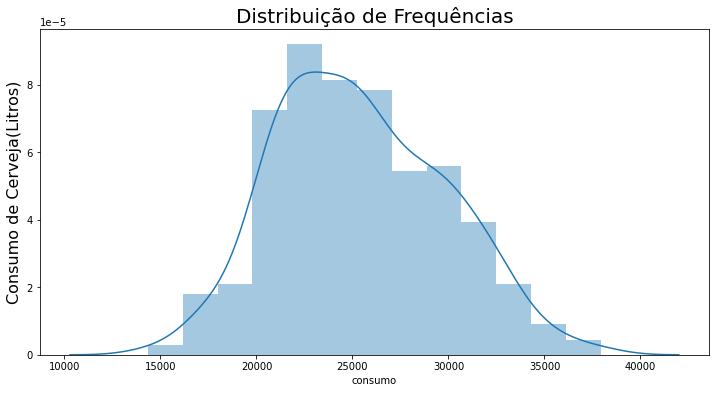

In [12]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja(Litros)', fontsize=16)
ax

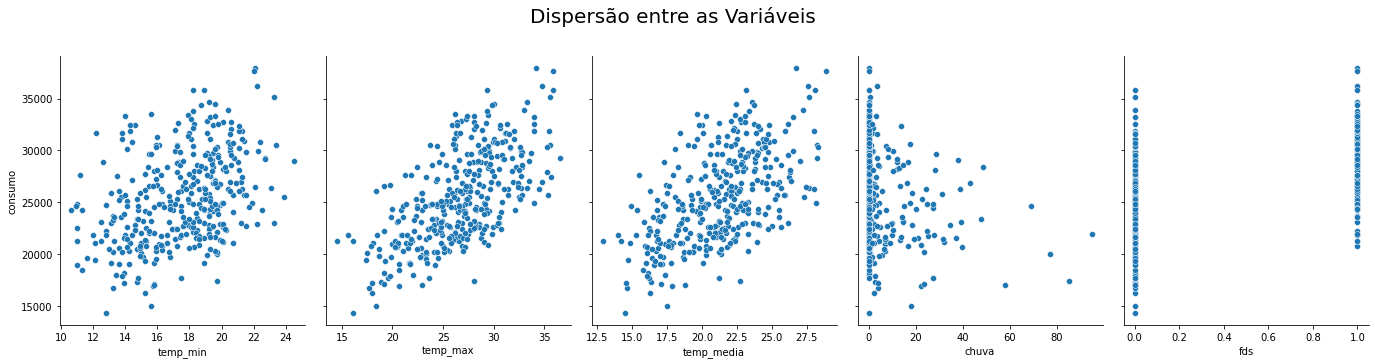

In [13]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min','temp_max','temp_media','chuva','fds'])
ax.figure.set_size_inches(20, 5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)
ax

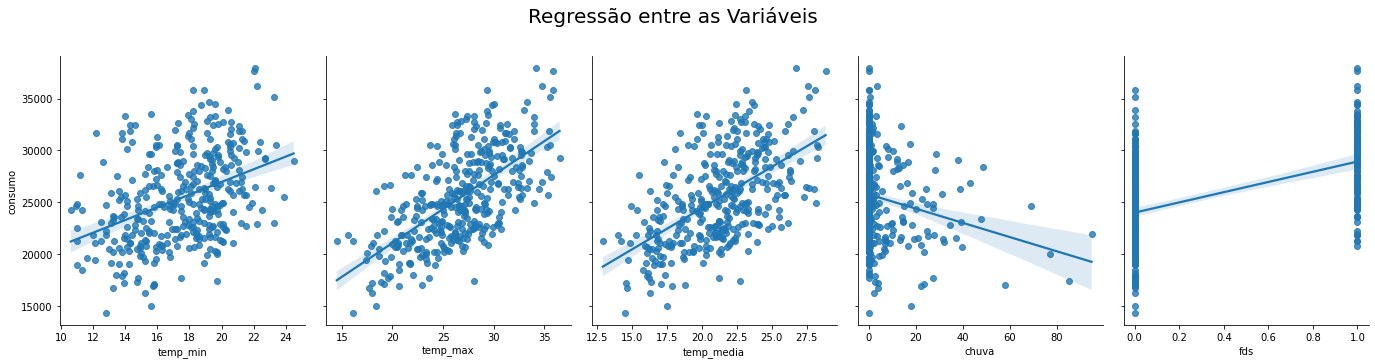

In [14]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min','temp_max','temp_media','chuva','fds'], kind='reg')
ax.figure.set_size_inches(20, 5)
ax.fig.suptitle('Regressão entre as Variáveis', fontsize=20, y=1.1)
ax

Avaliando Regressão Linear com Frequência das variáveis

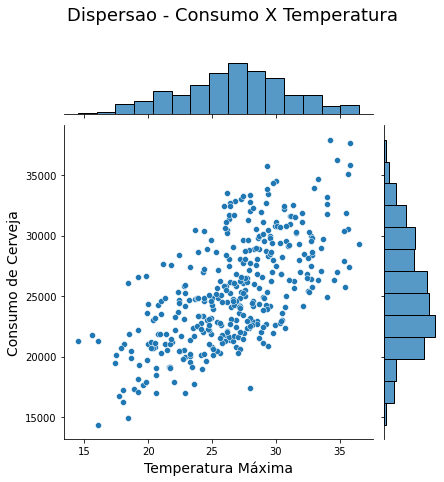

In [15]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.1)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

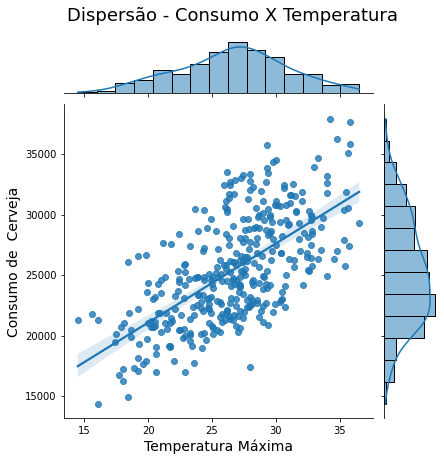

In [16]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de  Cerveja", fontsize=14)
ax

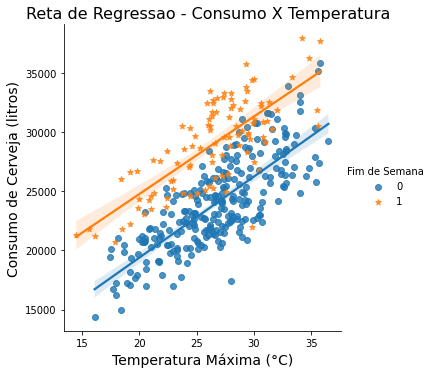

In [17]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados, hue='fds', markers=['o','*'], legend=False)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de Semana")
ax

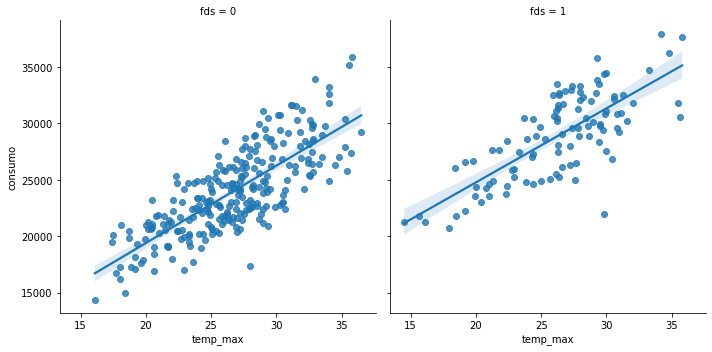

In [18]:
import seaborn as sns
sns.lmplot(x="temp_max", y="consumo", data=dados, col="fds")

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
y = dados['consumo']
X = dados[['temp_max', 'chuva', 'fds']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [22]:
X_train.head()

,temp_max,chuva,fds
195,27.6,0.0,0
344,30.3,0.0,0
288,35.7,0.0,0
59,26.3,3.0,1
220,26.2,0.0,1


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
modelo = LinearRegression()

In [24]:
modelo.fit(X_train, y_train)

LinearRegression()

In [25]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


Previsão do modelo para os dados de teste

In [26]:
y_predict = modelo.predict(X_test)

In [27]:
print('R² = %s' % metrics.r2_score(y_test, y_predict).round(2))

R² = 0.69


Variáveis explicativas do grupo de teste

In [28]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


Predição de consumo do Y teste

In [29]:
modelo.predict(entrada)[0].round(2)

26094.9

Modelo básico de predição do consumo com variáveis aleatórias

In [30]:
temp_max=40
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]

print('Nestas condições, a estimativa de consumo é de {0:.2f} litros'.format(modelo.predict(entrada)[0]))

Nestas condições, a estimativa de consumo é de 38742.53 litros


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Efeito médio de consumo considerando as demais variáveis zeradas

In [31]:
intercepto = modelo.intercept_.round(2)
intercepto

5951.98

Coeficientes de variação a cada 1 unidade de medida da variável considerando as demais inalteráveis

In [32]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [33]:
index=['Intercepto', 'Temp_max', 'Chuva(mm)','Final de semana']

In [34]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temp_max,684.736759
Chuva(mm),-60.782435
Final de semana,5401.083339


Previsão do modelo para os dados de treino

In [35]:
y_predict_train = modelo.predict(X_train)

Gráfico de dispersão para o valor estimado e o real, verificando uma dispersão da variância para os valores mais altos de consumo

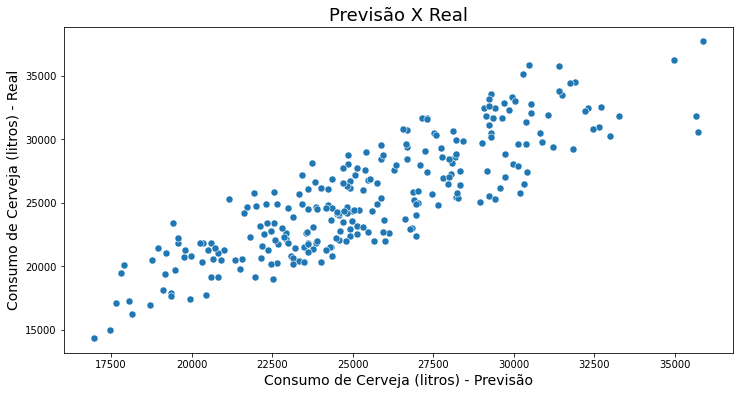

In [36]:
ax = sns.scatterplot(x=y_predict_train, y=y_train, s=50)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

Encontrando resíduo 

In [37]:
residuo = y_train - y_predict_train

Variância dos resíduos pelos valores preditos de Y treino com alta dispersão, gerando assim alta heterodasticidade

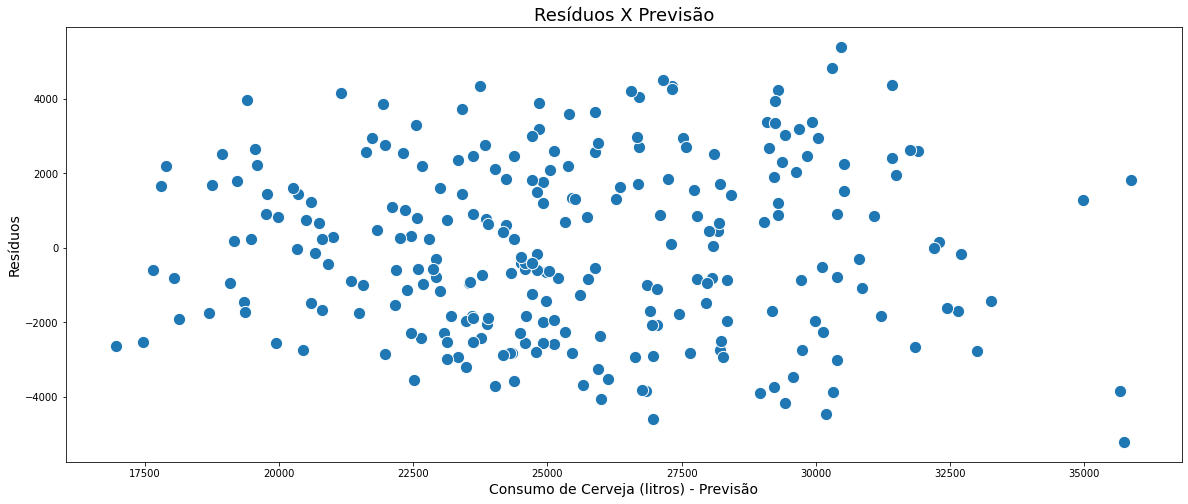

In [38]:
ax = sns.scatterplot(x=y_predict_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

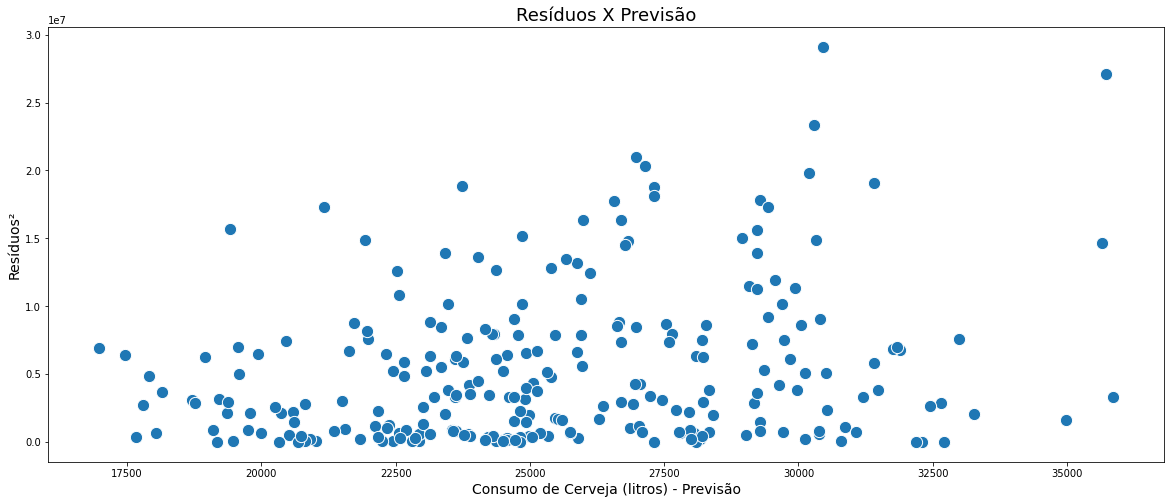

In [39]:
ax = sns.scatterplot(x=y_predict_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

Dispersão dos resíduos não se assemelha a uma curva normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


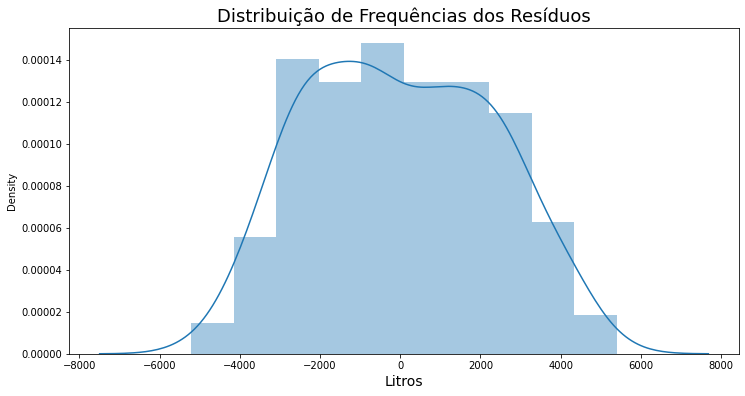

In [40]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

Criando modelo com variável Temp. Média

In [41]:
X2 = dados[["temp_media", "chuva", "fds"]]

In [42]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

In [43]:
modelo_2 = LinearRegression()
modelo_2.fit(X2_train, y2_train)

LinearRegression()

Comparando coeficientes do modelo treino de determinação com as duas variáveis de temp.

In [44]:
print('Modelo com Tem. Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com Tem. Máxima
R² = 0.73


In [45]:
print('Modelo com Tem. Média')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo com Tem. Média
R² = 0.66


Comparando os coeficientes do modelo teste com as variáveis de Temperatura

In [46]:
y_predict_test = modelo.predict(X_test)
y_predict_test2 = modelo_2.predict(X2_test)

In [47]:
print('Modelo com Tem. Máxima')
print('R² = {}'.format(metrics.r2_score(y_test, y_predict_test).round(2)))

Modelo com Tem. Máxima
R² = 0.69


In [48]:
print('Modelo com Tem. Média')
print('R² = {}'.format(metrics.r2_score(y2_test, y_predict_test2).round(2)))

Modelo com Tem. Média
R² = 0.66
